<a href="https://colab.research.google.com/github/trupti1428/Student-Performance/blob/main/student_Performance_Analysis_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing All the Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get the Data

In [1]:
from google.colab import files
data = files.upload()

Saving student_clustering.csv to student_clustering.csv


In [ ]:
students = pd.read_csv('student_clustering.csv')

In [ ]:
students.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [ ]:
students.tail()

,cgpa,iq
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108
199,8.82,117


In [ ]:
students.shape

(200, 2)

In [ ]:
students.info

<bound method DataFrame.info of      cgpa   iq
0    5.13   88
1    5.90  113
2    8.36   93
3    8.27   97
4    5.45  110
..    ...  ...
195  4.68   89
196  8.57  118
197  5.85  112
198  6.23  108
199  8.82  117

[200 rows x 2 columns]>

In [ ]:
students.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [ ]:
students.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [ ]:
students.corr()

,cgpa,iq
cgpa,1.000000,0.535301
iq,0.535301,1.000000


In [ ]:
students.cgpa.value_counts()

8.91    4
5.01    3
4.86    3
4.78    3
8.97    3
       ..
8.88    1
8.12    1
5.14    1
8.45    1
8.82    1
Name: cgpa, Length: 152, dtype: int64

In [ ]:
students.iq.value_counts()

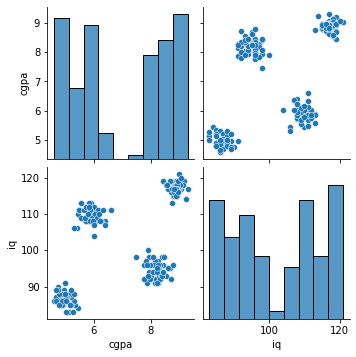

In [ ]:
sns.pairplot(students)

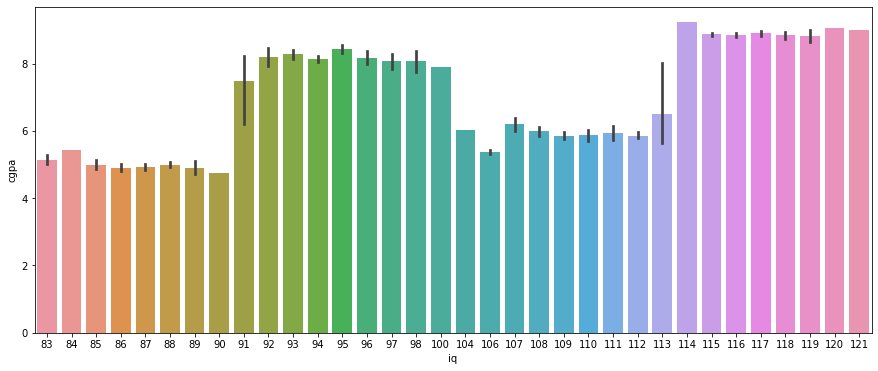

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'iq',y = 'cgpa',data =students)
plt.xticks(rotation = 0)
plt.show()

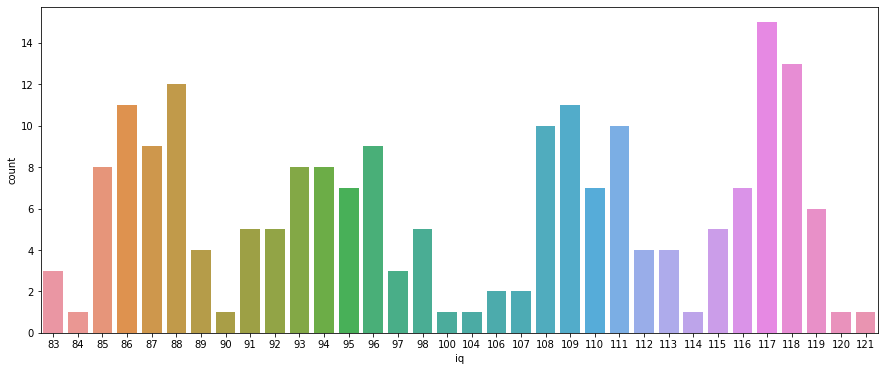

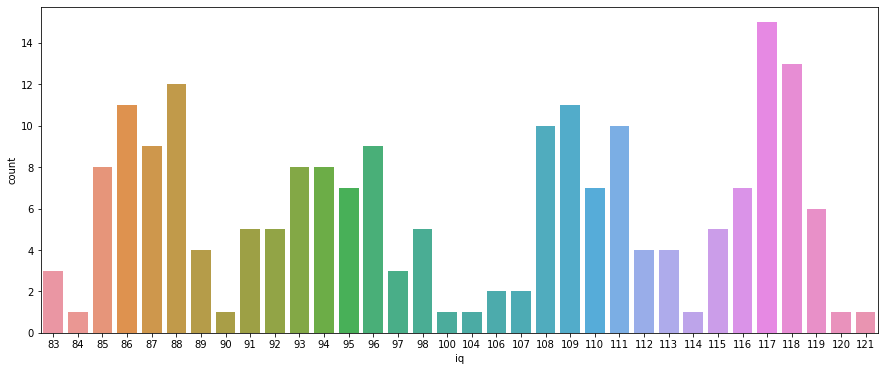

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'iq',data =students)
plt.xticks(rotation = 0)
plt.show()

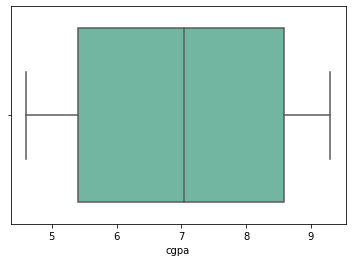

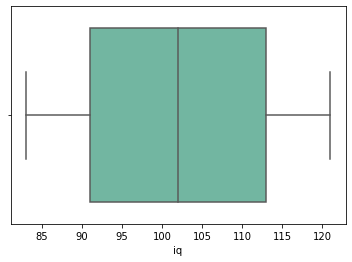

In [ ]:
for i in students.columns:
  sns.boxplot(x=students[i],orient='h',palette='Set2')
  plt.show()

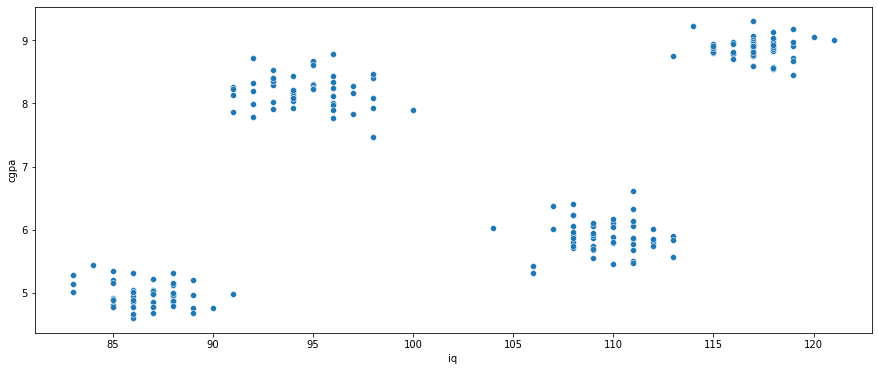

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'iq',y = 'cgpa',data =students)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
x = students[['iq','cgpa']]
x = np.array(x)
x.shape

(200, 2)

## Using the elbow method to find the optimal number of clusters

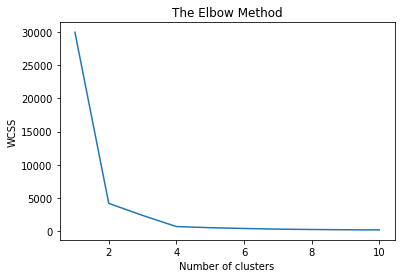

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Fitting K-Means to the dataset

In [ ]:
kmeans= KMeans(n_clusters=4,init= 'k-means++',random_state=42)

In [ ]:
y_kmeans = kmeans.fit_predict(x)

##Visualising the clusters

In [ ]:
y_kmeans.shape

(200,)

In [ ]:
y_kmeans

array([0, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0,
       3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0,
       1, 1, 3, 2, 1, 2, 0, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       3, 1, 2, 2, 3, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 2,
       0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 1, 2,
       2, 1], dtype=int32)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(200, 2)

In [ ]:
x[y_kmeans == 0,0]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

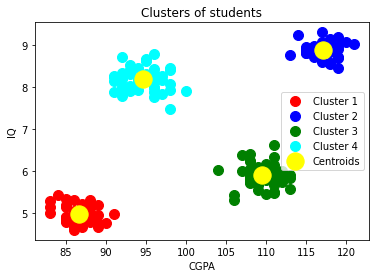

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.show()

In [ ]:
kmeans.inertia_

681.9696600000003

In [ ]:
X = students.drop(['cgpa'],axis =1)

In [ ]:
Y = students['cgpa']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Using Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=linear.predict(X_test)

In [ ]:
Y_pred

array([6.46389597, 6.53456694, 8.08932847, 7.59463162, 5.96919912,
       8.15999945, 6.53456694, 8.30134141, 6.11054107, 8.01865749,
       6.39322499, 7.59463162, 5.89852814, 6.0398701 , 6.39322499,
       7.45328966, 7.6653026 , 8.08932847, 7.6653026 , 7.6653026 ,
       6.6759089 , 7.6653026 , 7.38261869, 5.89852814, 7.80664456,
       7.17060575, 8.01865749, 5.82785716, 5.82785716, 5.6865152 ,
       6.46389597, 7.6653026 , 7.45328966, 8.15999945, 8.08932847,
       6.11054107, 8.15999945, 5.96919912, 8.08932847, 7.73597358])

In [ ]:
print('Training accurancy: ',linear.score(X_train,Y_train))
print('Testing accurancy: ',linear.score(X_test,Y_test))

Training accurancy:  0.2764501888081372
Testing accurancy:  0.3203151234908238


## Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1.2319572998637038
MSE: 1.7485708645247322
RMSE: 1.3223353827697164
